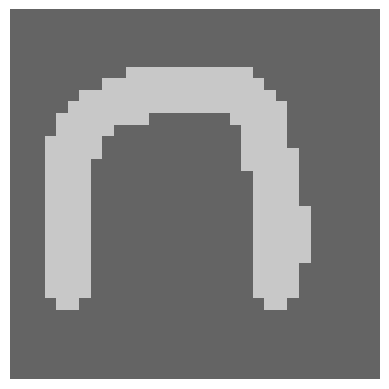

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

class Vertex:

    def __init__(self, key, colour=None):
        self.__key = key
        self.__colour = colour

    def __str__(self):
        return f'{self.__key}'

    def __repr__(self):
        return f'{self.__key}'

    def __eq__(self, other):
        return self.__key == other.__key

    def __hash__(self):
        return hash(self.__key)

    def get_key(self):
        return self.__key

    def get_colour(self):
        return self.__colour

    def set_colour(self, colour):
        self.__colour = colour


class ListGraph:

    def __init__(self, fill_value=0):
        self.list_of_neighbours = []
        self.fill_value = fill_value
        self.indexes = []
        self.objects_to_indexes = {}

    def is_empty(self):
        return len(self.indexes) == 0

    def insert_vertex(self, vertex):
        if vertex in self.indexes:
            return
        self.list_of_neighbours.append({})
        self.objects_to_indexes[vertex] = len(self.indexes)
        self.indexes.append(vertex)

    def insert_edge(self, vertex1, vertex2, edge=0.0):
        self.insert_vertex(vertex1)
        self.insert_vertex(vertex2)
        i = self.objects_to_indexes[vertex1]
        j = self.objects_to_indexes[vertex2]
        self.list_of_neighbours[i][vertex2] = edge
        self.list_of_neighbours[j][vertex1] = edge

    def delete_vertex(self, vertex):
        for dct in self.list_of_neighbours:
            if vertex in dct.keys():
                del dct[vertex]
        i = self.objects_to_indexes[vertex]
        self.list_of_neighbours.pop(i)
        self.indexes.remove(vertex)
        del self.objects_to_indexes[vertex]

    def delete_edge(self, vertex1, vertex2):
        i = self.objects_to_indexes[vertex1]
        j = self.objects_to_indexes[vertex2]
        del self.list_of_neighbours[i][vertex2]
        del self.list_of_neighbours[j][vertex1]

    def get_vertex_idx(self, vertex):
        return self.objects_to_indexes[vertex]

    def get_vertex(self, vertex_idx):
        return self.indexes[vertex_idx]

    def neighbours_idx(self, vertex_idx):
        neighbours_indexes = []
        for key, value in self.list_of_neighbours[vertex_idx].items():
            neighbours_indexes.append((self.objects_to_indexes[key], value))
        return neighbours_indexes

    def neighbours(self, vertex_idx):
        neighbours_objects = []
        for key, value in self.list_of_neighbours[vertex_idx].items():
            neighbours_objects.append((key, value))
        return neighbours_objects

    def order(self):
        return len(self.indexes)

    def size(self):
        sum_of_edges = 0
        for dct in self.list_of_neighbours:
            sum_of_edges += len(dct)
        return sum_of_edges // 2

    def edges(self):
        result_list = []
        for i in range(len(self.list_of_neighbours)):
            for key, edge in self.list_of_neighbours[i].items():
                vertex1 = self.indexes[i]
                vertex2 = key
                result_list.append((vertex1, vertex2, edge))
        return result_list


def print_graph(g):
    n = g.order()
    print("------GRAPH------", n)
    for i in range(n):
        v = g.get_vertex(i)
        print(v, end=" -> ")
        nbrs = g.neighbours(i)
        for j, w in nbrs:
            print(str(j), w, end=";")
        print()
    print("-------------------")


def primMST(G):
    size = G.order()
    intree = [0 for _ in range(size)]
    distance = [float("inf") for _ in range(size)]
    parent = [-1 for _ in range(size)]

    edges = []

    # result MST graph, currently without any edges
    mst_graph = ListGraph()
    for i in range(G.order()):
        mst_graph.insert_vertex(G.get_vertex(i))

    vertex = 0  # starting vertex
    while intree[vertex] == 0:
        intree[vertex] = 1

        for neighbour, edge in G.neighbours_idx(vertex):
            if edge < distance[neighbour] and intree[neighbour] == 0:
                distance[neighbour] = edge
                parent[neighbour] = vertex

        min_distance = float("inf")
        for v in range(G.order()):
            if intree[v] == 0:
                if distance[v] < min_distance:
                    min_distance = distance[v]
                    vertex = v

        edge_weight = 0
        for neighbour, edge in G.neighbours_idx(parent[vertex]):
            if neighbour == vertex:
                edge_weight = edge
                break

        mst_graph.insert_edge(G.get_vertex(parent[vertex]), G.get_vertex(vertex), edge=edge_weight)
        edges.append(edge_weight)

    return mst_graph, sum(edges[:-1])

def DFS(g, start):
    stack = [start]
    visited = [start]
    while stack:
        vertex = stack.pop()
        for neighbour, _ in g.neighbours(g.get_vertex_idx(vertex)):
            if neighbour not in visited:
                stack.append(neighbour)
                visited.append(neighbour)
    return visited
                

G = ListGraph()
img = cv2.imread('sample.png', cv2.IMREAD_GRAYSCALE)
X, Y = img.shape
for i in range(1, X-1):
    for j in range(1, Y-1):
        G.insert_edge(Vertex(X*j+i), Vertex(X*(j-1)+(i+1)), edge=abs(int(img[i][j])-int(img[i+1][j-1])))
        G.insert_edge(Vertex(X*j+i), Vertex(X*(j)+(i+1)), edge=abs(int(img[i][j])-int(img[i+1][j])))
        G.insert_edge(Vertex(X*j+i), Vertex(X*(j+1)+(i+1)), edge=abs(int(img[i][j])-int(img[i+1][j+1])))
        G.insert_edge(Vertex(X*j+i), Vertex(X*(j-1)+(i)), edge=abs(int(img[i][j])-int(img[i][j-1])))
        G.insert_edge(Vertex(X*j+i), Vertex(X*(j+1)+(i)), edge=abs(int(img[i][j])-int(img[i][j+1])))
        G.insert_edge(Vertex(X*j+i), Vertex(X*(j-1)+(i-1)), edge=abs(int(img[i][j])-int(img[i-1][j-1])))
        G.insert_edge(Vertex(X*j+i), Vertex(X*(j)+(i-1)), edge=abs(int(img[i][j])-int(img[i-1][j])))
        G.insert_edge(Vertex(X*j+i), Vertex(X*(j+1)+(i-1)), edge=abs(int(img[i][j])-int(img[i-1][j+1])))

G_mst, _ = primMST(G)
edges = G_mst.edges()
sorted_edges = sorted(edges, key=lambda entry: entry[2])
sorted_edges.reverse()
G_mst.delete_edge(sorted_edges[0][0], sorted_edges[0][1])
img_result = np.zeros((X, Y), dtype='uint8')
first_path = DFS(G_mst, sorted_edges[0][0])
second_path = DFS(G_mst, sorted_edges[0][1])

for v in first_path:
    x = v.get_key()%X
    y = v.get_key()//X
    img_result[x][y] = 200
for v in second_path:
    x = v.get_key()%X
    y = v.get_key()//X
    img_result[x][y] = 100

plt.imshow(img_result, 'gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()